#Integrando o G-Colab ao G-planilhas

---

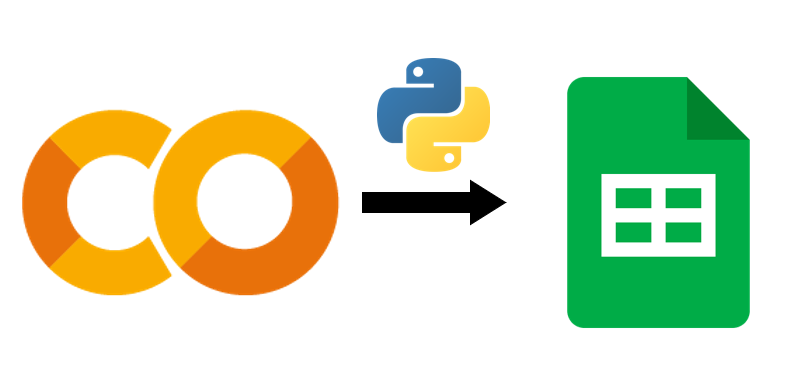

### 1-Importando e instalando a API do G-planilhas e o Pandas para manipular DataFrames

In [ ]:
#Instalação
!pip install --upgrade gspread
!pip install pandas

#Importação
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#Obs.: É necessário uma conta no google 

### 2-Escolhendo | Criando um Dataframe com Pandas

In [ ]:
import pandas as pd
#Criando um dicionário, a palavra chave será o título da coluna
obj = {'col1': [1, 2], 'col2': [3, '#Inscreva-se no canal']}
#Transformando o dicionário em Dataframe pela bibloteca do Pandas
df = pd.DataFrame(data=obj)
df

### 3-Abrindo a planilha escolhida na "aba" determinada

In [ ]:
#Salve uma planilha na sua conta da google com o nome: 'Planilha_escolhida', e o nome da Aba como: 'NomedaAba'
#Definindo a planilha escolhida como uma variável
sh = gc.open('Planilha_escolhida')
pag = sh.worksheet('NomedaAba')
#ou pag = sh.sheet1, ordem que as abas se encontram
#Como na Imagem Abaixo de referência, os nomes devem ser IDÊNTICOS.

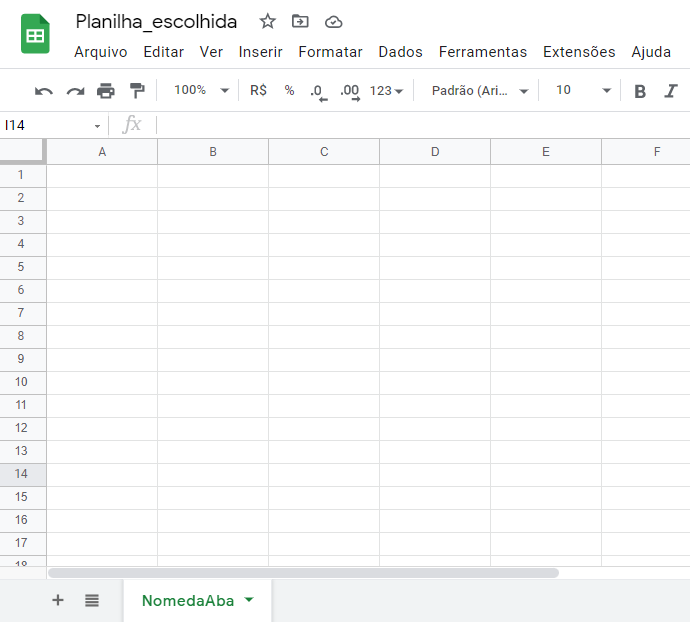

### 4-Inserindo os dados

In [ ]:
pag.clear() #limpa a página "aba"
#pag.update seleciona a aba e atualiza
pag.update([df.columns.values.tolist()] + df.values.tolist(), value_input_option='USER_ENTERED') 
#transforma o dataframe em listas
#[dataset.columns.values.tolist()] Título da tabela, coluna por coluna no excel
#dataset.values.tolist() Título da coluna no excel
#value_input_option='USER_ENTERED' tira o ' e transforma os valures numéricos em variáveis numéricas como 'int' !

In [ ]:
pag.row_values(1)

In [ ]:
import pandas as p


#pega os dados da panilha
dados = pd.DataFrame(pag.get_all_records())
#sobrepoe dois dataframes
df = pd.concat([dados, df])
df
#insere novamente o novo dataframe
pag.update([df.columns.values.tolist()] + df.values.tolist(), value_input_option='USER_ENTERED') 
#pag.update([df.columns.values.tolist()] + df.values.tolist()) 
print([df.columns.values.tolist()])
print()


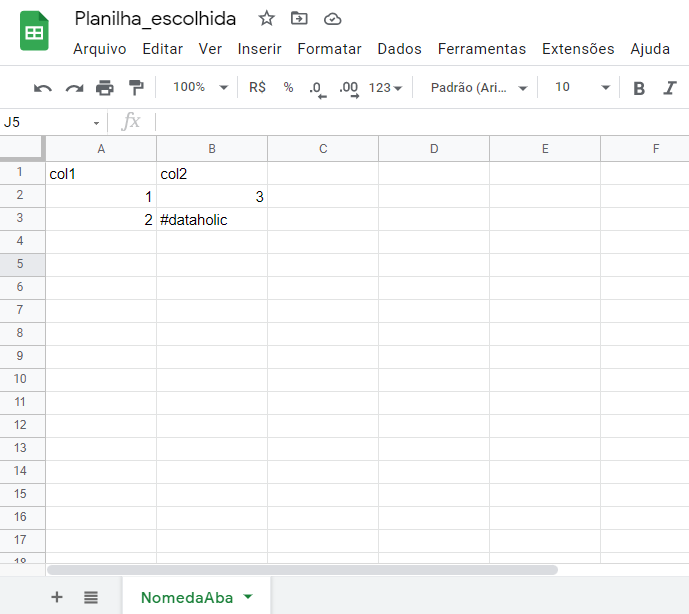

### Biblioteca de referência: https://docs.gspread.org/en/latest/